In [84]:
# Import libraries and functions
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import t, probplot
from statsmodels.api import qqplot
from statsmodels.formula.api import ols


# Read csv file
coasters = pd.read_csv("Coasters_2015.csv")

In [62]:
# Take a look at the data
coasters.head()

,Name,Park,Track,Speed,Height,Drop,Length,Duration,Inversions
0,Top Thrill Dragster,Cedar Point,Steel,120.0,420.0,400.0,2800.0,NaN,0
1,Superman The Escap,Six Flags Magic Mountain,Steel,100.0,415.0,328.1,1235.0,NaN,0
2,Millennium Force,Cedar Point,Steel,93.0,310.0,300.0,6595.0,165.0,0
3,Goliath,Six Flags Magic Mountain,Steel,85.0,235.0,255.0,4500.0,180.0,0
4,Titan,Six Flags Over Texas,Steel,85.0,245.0,255.0,5312.0,210.0,0


In [63]:
coasters.describe()

,Speed,Height,Drop,Length,Duration,Inversions
count,241.000000,241.000000,118.000000,241.000000,157.000000,241.000000
mean,55.350622,125.096598,148.613475,2570.072365,123.019108,0.556017
std,18.664831,70.264668,69.136487,1614.980056,45.087447,0.497886
min,4.500000,8.000000,47.000000,197.500000,28.000000,0.000000
25%,45.000000,75.000000,95.000000,1213.900000,90.000000,0.000000
50%,55.000000,115.000000,141.000000,2423.000000,120.000000,1.000000
75%,65.300000,155.000000,193.525000,3582.700000,150.000000,1.000000
max,149.100000,420.000000,400.000000,8133.100000,240.000000,1.000000


### One-sample proportion z-test

In [89]:
# Count how many rollercoasters have a steel track v/s how many have a wood track
print(coasters["Track"].value_counts())

Steel    212
Wood      29
Name: Track, dtype: int64


In [88]:
# Calculate the roportion of steel rollercoasters
steel_p = 212 / (212+29)

# Print the proportion
print("The proportion of steel coasters in 2015 is equal to: ", steel_p)             

The proportion of steel coasters in 2015 is equal to:  0.8796680497925311


**Check conditions:**
* n < 10% of total population. We can assume that 241 rollercoasters is less than 10% of all rollercoasters in the world.
* random: we can assume that we were given a random sample of rollercoasters.
* successes vs failures : 241 * 0.88 = 212, 241 * 0.12 = 29. Both values are greater than 10.

However, a rollercoasters' expert suggests that during 2022 the proportion of steel rollercoasters has changed. Her study shows that 320 out of 355 coasters have a steel track.

* h0 : p̂ = steel_p -> the proportion of steel coasters in 2022 is 0.88
* ha : p̂ ≠ steel_p -> the proportion of steel coasters in 2022 is different from 0.88

To test our null hypothesis, we will make use of proportions_ztest which we imported at the beginning of the notebook.

**Arguments**
* count = # ; number of successes if Null Hypothesis is True. (total observed * hypothesized proportion)
* nobs = # ; size of observed sample
* value = # ; observed proportion
* alternative = "nameOfAlternative" ; Type of test(two-sided or one-sided)

In [11]:
# Store z_test and p_value
z_test , p_value = proportions_ztest(count = 312 , nobs = 355, value = 0.9, alternative = "two-sided")

# Print results
print("The z test values is: ", z_test, ". The p-value is: ", p_value)

The z test values is:  -1.220011473889561 . The p-value is:  0.22246052533158622


Since the p-value is greater than 0.05 we fail to reject the null hypothesis. We do not have enough evidence to say that the proportion of steel rollercoasters in 2022 has changed sinced 2015.

### Confidence Interval for proportions

Now let's calculate our confidence interval for steel track proportion using our 2015 data. In order to do so, we will use proportion_confint which we imported at the beginning of the notebook.

**Arguments:**
* count = # ; number of successes
* nobs = # ; size of observed sample
* alpha = # ; the desired significance level

**Check conditions:**
* n < 10% of total population. We can assume that 241 rollercoasters is less than 10% of all rollercoasters in the world.
* random: we can assume that we were given a random sample of rollercoasters.
* successes vs failures : 241 * 0.88 = 212, 241 * 0.12 = 29. Both values are greater than 10.

In [ ]:
# Caclulate confidence interval and store in conf_prop
conf_prop = proportion_confint(count = 212, nobs = 241, alpha = 0.05)
print(conf_prop)

We are 95% confident that between 83% and 92% of the roller coasters in the world have a steel track.

### Confidence Interval for means

Now let's calculate our confidence interval for averaged speed using our 2015 data. In order to do so, we will use t.interval which we imported at the beginning of the notebook.

**Check conditions:**
* n >= 30 , 241 > 30
* independence: we can assume it is a random sample, and that the average speed of one rollecoaster does not affect the rest.

**Arguments:**
* loc = # ; mean value from our sample
* scale = # ; standard deviation from our sample
* df = # ; degrees of freedom (n-1)
* alpha = desired significance value

In [91]:
# Calculate standard deviation for speed
sd_speed = coasters["Speed"].std()

# Calculate mean for speed
mean_speed = coasters['Speed'].mean()

# Assign the t-interval values into t_speed
t_speed = t.interval(loc = mean_speed, scale = sd_speed,df = 240, alpha = 0.05)

# Print our results
print("The t-interval is: ", t_speed)

The t-interval is:  (54.17898635866439, 56.52225845461366)


We are 95% confident that the average speed of rollercoasters in the world will be between 54 and 56 mph.

## Inference for Linear Regression using statsmodels.api
Let's learn how to perform inference with linear regression! We will use a dataset from the world health organization.

In [18]:
# Read data set
who = pd.read_csv("world_health.csv")

In [19]:
# Take a look at the data set
who.head()

,Country,Year,Status,life_exp,adult_mort,inf_deaths,alcohol,percentage_expenditure,hepatitisb,measles,...,polio,total_expenditure,diphteria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_comp_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Is there an association between schooling and life expectancy after adjusting for relevant confounders?
* h0 : there's no association between schooling and life expectancy
* ha : there's an association between schooling and life expectancy

To plot some of the graphs for checking conditions and asummptions, we must fit our data into our linear model. We will use ols which we imported at the beginning of the notebook.

**Arguments:**
* data = dataframe
* formula = "dependent ~ independent" 

After writing our arguments, we will type .fit()

* smf.ols(data = dataframe, formula = "dependent ~ independent").fit()

In [23]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Fit model
model1 = ols(data =  who, formula = "life_exp ~ schooling").fit()

### Linearity
There are different ways of checking linearity. In order to put in practice what we've previously learned we will use a scatterplot to check if the relationship between life_exp and schooling is truly linear or not.

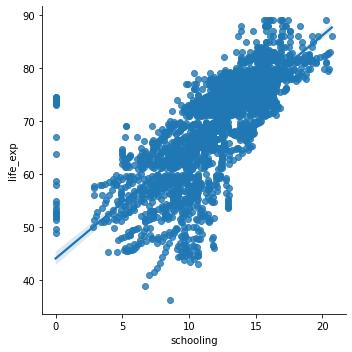

In [24]:
# Create scatterplot using lmplot from seaborn.
sns.lmplot(data = who, x = "schooling", y = "life_exp")
plt.show()

We can say that the scatterplot follows a moderately weak, positive linear associaiton.

### Independence and Equal Variance
To check independence and equal variance we will use a scatterplot. More specifically, we will plot the fitted and residual values.

In [82]:
# Use the fitted model to store fitted and residual values
fitted = model1.predict()
residuals = model1.resid

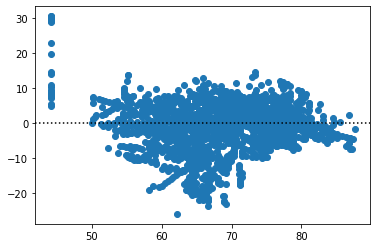

In [83]:
# Plot scatterplot using fitted and residual values
plt.scatter(fitted, residuals)

# Add horizontal line
plt.axhline(y=0, color="black", linestyle=":")

# Show plot
plt.show()

Awesome! we can see that the values seem to be randomly scattered around the 0 axis.

### Normality 
To check normality we will use qqplot, which we imported at the beginning.

**Arguments for qqplot:**
* data = modelName.resid 
* line = "s" ; standardized line

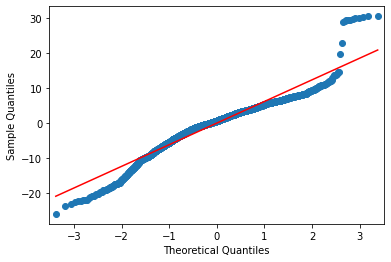

In [31]:
# Plot the qqplot. Note that there's a semi-colon at the end, which is to avoid jupyternotebook from returning  
qqplot(data = model1.resid, line = "s");

# Show plot
plt.show()

The end and beginning of the line seem to fall out of the red line, so we will proceed with caution.

Great! our conditions have been satisfied. Let's look at the summary of the linear model.

In [434]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     3599.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:00:22   Log-Likelihood:                -8964.3
No. Observations:                2768   AIC:                         1.793e+04
Df Residuals:                    2766   BIC:                         1.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.1089      0.437    100.992      0.0

Schooling has a positive association of 2.1, with a standard error of 0.034 , with a t-ratio of 60 which gives a p-value < 0.05, corresponding to a 95% confident interval for the beta coefficient between 2.035 and 2.172.

We can reject the null hypothesis, since we have enough evidence to say that there's a positive association between schooling and life expectancy.

## Multiple Linear Regression

Now, what if we consider a third variable?

* h0 : there's no difference between country status and country's life expectancy, when adjusting for schooling
* ha : there's a difference between country status in country's life expectancy, when adjusting for schooling

In [39]:
# First, we will fit the model. We added a second independent variable, status. As this variable is categorical,
# we must add a C before its name.

# formula = "dep_var ~ ind_var1 + C(ind_var2)"

model2 = smf.ols(data=who, formula='life_exp ~ schooling + C(Status)').fit()

Now, let's check conditions. This is pretty much the same process we did before.

### Linearity

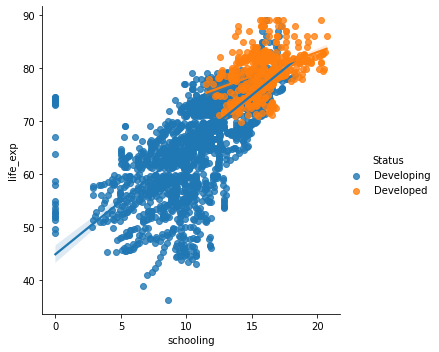

In [96]:
# Plot lmplot with schooling and life_exp. We will add the parameter hue to see how it changes by status.
sns.lmplot(data = who, x = "schooling", y = "life_exp", hue = "Status")

# Show plot
plt.show()

Great! Both groups seem to follow a moderately weak, positive, linear association.

### Independence and Equal Variance

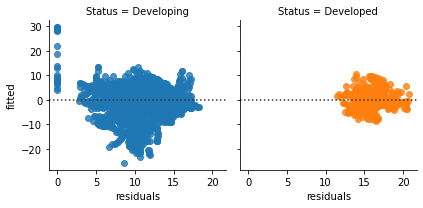

In [65]:
# Create two grids: one for developing and one for developed. 
g = sns.FacetGrid(data = who, col = "Status", hue = "Status")

# Map the residual plots onto the grids.
g.map(sns.residplot, "schooling", "life_exp")

# Set labels. See extra material for a more thorough explanation of this step.
g.axes[0,0].set_xlabel('residuals')
g.axes[0,1].set_xlabel('residuals')
g.axes[0,0].set_ylabel('fitted')

# Show plot
plt.show()

Awesome! Both graphs seem to be randomly scattered around the 0 axis.

### Normal Population

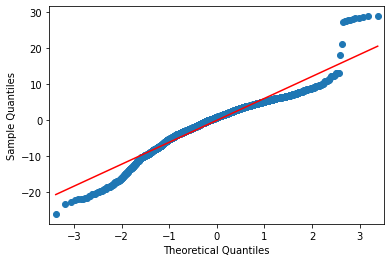

In [41]:
# Graph qqplot by using model2.resid
sma.qqplot(model2.resid, line = "s");

# Show graph
plt.show()

As also seen in the simple linear regression example, the end and beginning of the line seem to fall out of the red line, so we will proceed with caution. Now, let's look at the summary

In [93]:
# Show model2 summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     1877.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:06:52   Log-Likelihood:                -8930.6
No. Observations:                2768   AIC:                         1.787e+04
Df Residuals:                    2765   BIC:                         1.788e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Since the p-value < 0.05 we can reject the null hypothesis. Compared to developed countries, countries in development have a lower life expectancy average. In conclusion, there's an association between schooling and life expectency when considering both developed and in development countries.

Let's predict the life expectancy for a new country. Let's say that this country has an average of 12 years of schooling and it's a developed country.

In [55]:
# Get values from the table
intercept = 48.66
st_coef = -3
sc_coef = 1.93 
exp = intercept + sc_coef * 12 - 3 * 0

# Print results
print("The life expenctancy is: " , exp, " years.")

The life expenctancy is:  71.82  years.


We could also create a function to make this process easier and faster!

In [94]:
# Define function and specify our arguments (the values that change)
def life_expectancy(schooling , status):
    exp = 48.66 + 1.93 * schooling - 3 * status
    print("The life expectancy is: " , exp, " years.")

# Call function
life_expectancy(12, 0)

The life expectancy is:  71.82  years.


In [ ]:
If we recall our scatterplot, we can see that the obtained value makes sense! 

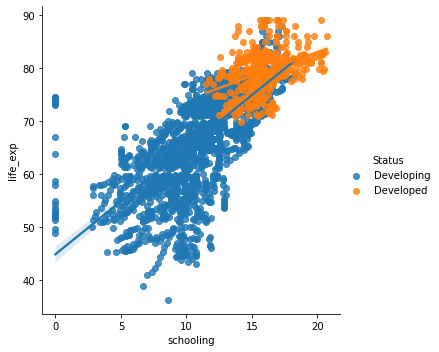

In [95]:
sns.lmplot(data = who, x = "schooling", y = "life_exp", hue = "Status")
plt.show()

## Tips
* Fit the linear regression model first! You will need it to create some of the graphs.

## References
* https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html
* https://research.library.gsu.edu/c.php?g=844869&p=7657842
* https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704-ep713_multivariablemethods/bs704-ep713_multivariablemethods2.html